In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

import warnings 
warnings.filterwarnings('ignore')

In [107]:
data = pd.read_csv("/kaggle/input/energy-consumption-time-series-dataset/KwhConsumptionBlower78_1.csv")
data.head()

,Unnamed: 0,TxnDate,TxnTime,Consumption
0,76229,01 Jan 2022,16:55:52,1.010
1,76258,01 Jan 2022,21:45:29,0.908
2,76287,01 Jan 2022,12:24:52,0.926
3,76316,01 Jan 2022,04:07:36,0.928
4,76345,01 Jan 2022,06:52:25,0.916


In [97]:
df ={"Date":[],"Consumption":[]}
for i in list(set(data["TxnDate"])):
    df["Date"].append(i)
    df["Consumption"].append(np.mean(data[data["TxnDate"]==i].Consumption))

In [101]:
df = pd.DataFrame(df)
data =df

In [108]:
data["Date"] = pd.to_datetime(data["TxnDate"]+" "+data["TxnTime"])

In [109]:
data.drop(["Unnamed: 0","TxnDate","TxnTime"],axis=1,inplace=True)
data.head()

,Consumption,Date
0,1.010,2022-01-01 16:55:52
1,0.908,2022-01-01 21:45:29
2,0.926,2022-01-01 12:24:52
3,0.928,2022-01-01 04:07:36
4,0.916,2022-01-01 06:52:25


In [103]:
print(f"min date: {data['Date'].min()}, max date: {data['Date'].max()}")
print(f"Date Range: {data['Date'].max()-data['Date'].min()}")

min date: 2022-01-01 00:00:00, max date: 2022-01-20 00:00:00
Date Range: 19 days 00:00:00


In [41]:
result = adfuller(data.Consumption.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.847489
p-value: 0.002457


 p-value(0.002457) is less than the significance level(0.05)

<AxesSubplot:>

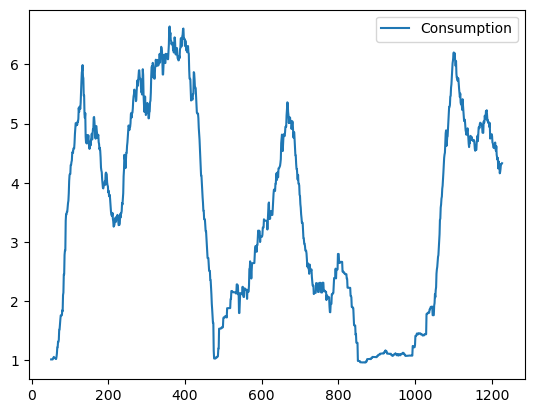

In [112]:
rolling_data = data.rolling(window=52).mean()
rolling_data.plot()

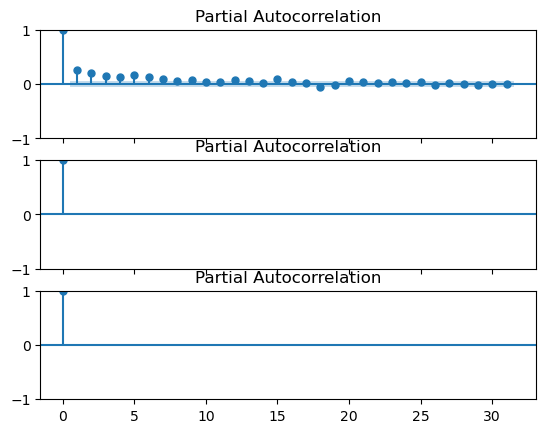

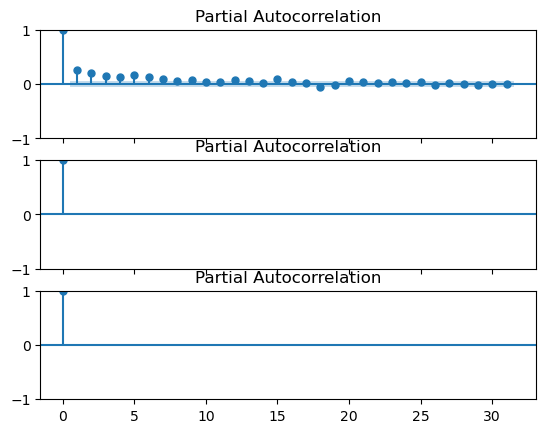

In [56]:
fig, axes = plt.subplots(3, 1, sharex=True)
plot_pacf(data.Consumption,ax=axes[0])
plot_pacf(data.Consumption.diff(),ax=axes[1])
plot_pacf(data.Consumption.diff().diff(),ax=axes[2])

In [130]:
model = ARIMA(data.Consumption, order=(1,1,1),seasonal_order=(1,1,1,2))
model_fit = model.fit()
print(model_fit.summary())

                                    SARIMAX Results                                    
Dep. Variable:                     Consumption   No. Observations:                 1228
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 2)   Log Likelihood               -3155.067
Date:                         Sun, 16 Apr 2023   AIC                           6320.134
Time:                                 17:47:03   BIC                           6345.687
Sample:                                      0   HQIC                          6329.750
                                        - 1228                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0023      0.027     -0.088      0.930      -0.055       0.050
ma.L1         -0.9197      0.012    -74.403      0.000     

<AxesSubplot:ylabel='Density'>

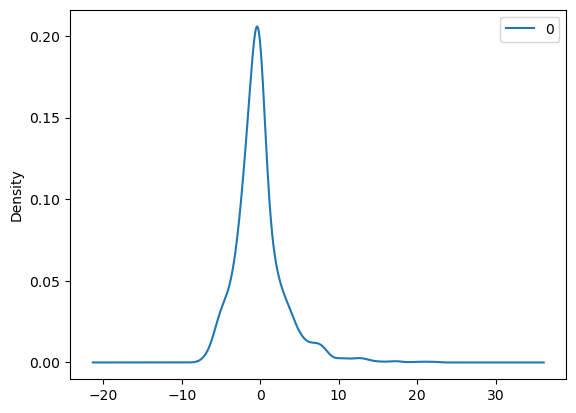

In [131]:
pd.DataFrame(model_fit.resid).plot(kind="kde")

In [132]:
predicted = model_fit.predict(steps=52)

In [133]:
data_ = data.copy()
data_["Consumption"] = predicted

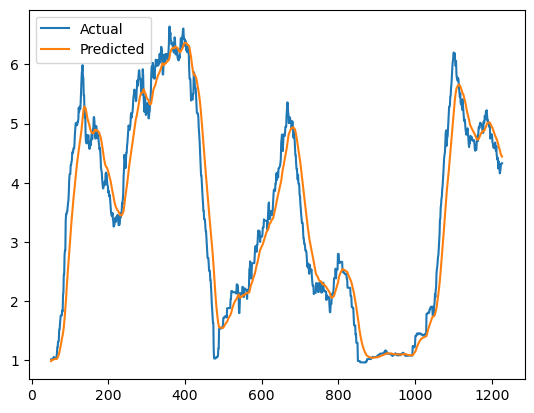

In [134]:
plt.plot(rolling_data_1)
plt.plot(rolling_data_2)
plt.legend(["Actual","Predicted"])

In [137]:
predicted_data

1228    4.505840
1229    4.314149
1230    4.507331
1231    4.320132
1232    4.512878
          ...   
1343    4.630829
1344    4.823574
1345    4.636377
1346    4.829123
1347    4.641925
Name: predicted_mean, Length: 120, dtype: float64

(1000.0, 1400.0)

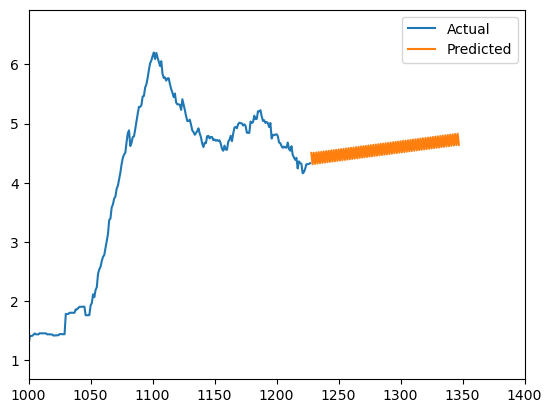

In [143]:
predicted_data = model_fit.forecast(steps=120)
plt.plot(rolling_data_1)
plt.plot(predicted_data)
plt.legend(["Actual","Predicted"])
plt.xlim(1000, 1400)
# plt.ylim(0, 0.04)

(1200.0, 1400.0)

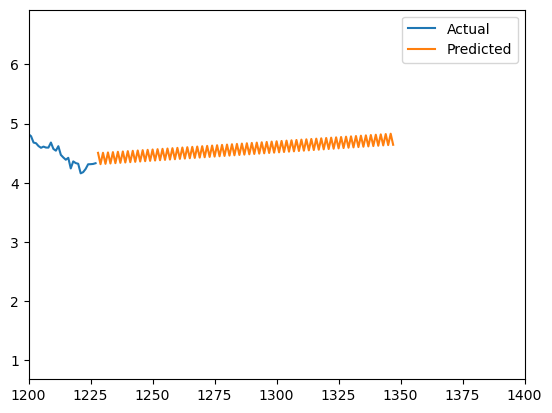

In [144]:
predicted_data = model_fit.forecast(steps=120)
plt.plot(rolling_data_1)
plt.plot(predicted_data)
plt.legend(["Actual","Predicted"])
plt.xlim(1200, 1400)